# $Brazil \ Housing \ Exploratory \ Data \ Analysis \$

# ---------------------------------------------------------------------------------------------------------------

In [4]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate as tab

# ---------------------------------------------------------------------------------------------------------------

## LEVEL 0 Analysis:

In [3]:
#reading the data file and converting to DataFrame...
df=pd.read_csv("data (1).csv")
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [4]:
#first 5...
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
#last 5...
df.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165,22,1587


In [6]:
#shape (no. of rows & columns)...
df.shape

(10692, 13)

In [7]:
#extracting the statistical information/description...
df.describe()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,5.067995,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,6.069050,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,301.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [8]:
#extracting the inside information... 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [9]:
#checking the null/nan values...
df.isnull().sum()
#No null/nan values...

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [10]:
#checking the data-types [(object(categorical/strings) or numerical]...
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [11]:
#extracting column names...
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [194]:
#Seprating categorical and continuous variables...

def seprate_data_types(df):
    
    categorical = []
    continuous = []
    
    for column in df.columns: 
        
        if df[column].nunique() < 6:     
            categorical.append(column)
            
        else:
            continuous.append(column)
            
    return categorical, continuous 

categorical, continuous = seprate_data_types(df)       

In [195]:
#table=|categorical|countinuous|
#creating a table...

print(tab
        ({"Categorical":categorical,
                "Continuous":continuous},
                                        headers=["CATEGORICAL",
                                                 "CONTINUOUS"]))

CATEGORICAL    CONTINUOUS
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


# ---------------------------------------------------------------------------------------------------------------

## LEVEL 1 Analysis:

# $Univariate \ Analysis \$

In [19]:
#Categorical column/data information extracting user-defined function...

def cat_info(col):
    
        #unique() returns the unique values in the column...
        print(f"Unique values in {col} : {df[col].unique()}")
        
        #mode() returns the mode(most recurring value (index[0])) of the column...
        print(f"Mode of {col} : {df[col].mode()[0]}")
        
        #isnull().sum() counts the number of null in dataframe...
        print(f"Number of missing values in {col} : {df[col].isnull().sum()}")
        
        #`checking if null values are present...
        if df[col].isnull().sum() > 0:
            
            print(f"\nThere are null values in the {col} column")

In [197]:
#User defined function for histogram...
def histplot(col):
    
    fig, ax = plt.subplots()
    
    ax = sns.countplot(x = df[col])

    for bar in ax.patches:
    
        percentage = f"{round(bar.get_height() /len(df), 2)}%" 
    
        x = bar.get_x() + bar.get_width() /2
    
        y = bar.get_height()   
    
        ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
        #ax.annotate(percentage, (x, y), va = "top", ha ="center" )
           
plt.show()

In [231]:
def box_hist(col):

    fig, ax = plt.subplots(1, 2, figsize= (20, 7))

    sns.histplot(x = df[col], ax =ax[1], color = "m") 

    sns.boxplot(x = df[col], ax = ax[0], color = "g") 

    plt.show()

In [196]:
print(tab
        ({"Categorical":categorical,
                "Continuous":continuous},
                                        headers=["CATEGORICAL",
                                                 "CONTINUOUS"]))

CATEGORICAL    CONTINUOUS
-------------  -------------------
city           area
animal         rooms
furniture      bathroom
               parking spaces
               floor
               hoa (R$)
               rent amount (R$)
               property tax (R$)
               fire insurance (R$)
               total (R$)


## Analysis of categorical data:

## 1.city

In [21]:
cat_info("city")

Unique values in city : ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
Mode of city : São Paulo
Number of missing values in city : 0


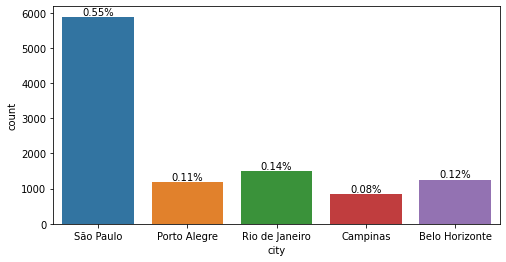

In [105]:
histplot("city")

##### City overview ^

##### From the above diagramatical representation we can notice that "Sau Paula" city has highest proportion of houses i.e; 55%  compared to the other cities and, the least proportion of houses are of "Campinas" city.

## 2.Animal

In [87]:
cat_info("animal")

Unique values in animal : ['acept' 'not acept']
Mode of animal : acept
Number of missing values in animal : 0


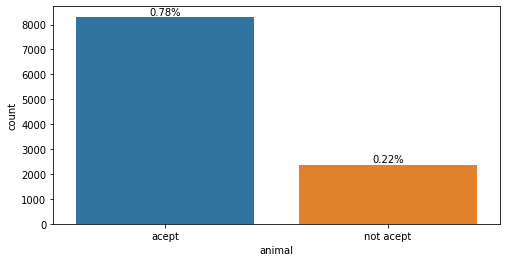

In [106]:
histplot("animal")

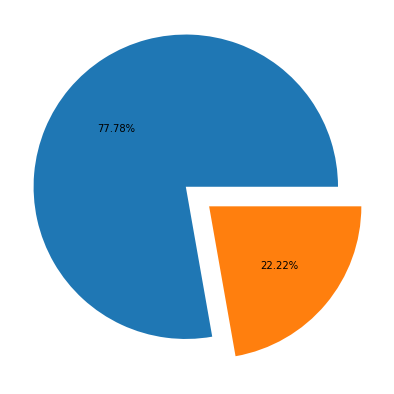

In [166]:
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["animal"].value_counts()

plt.pie(percentage,explode=(0.1,0.1), autopct= "%0.2f%%")  

plt.show()

##### Here from the above two represented diagrams we can notice that the highest animal allowance is observed in Brazil  i.e;  77.78%

## 3.Furniture

In [88]:
cat_info("furniture")

Unique values in furniture : ['furnished' 'not furnished']
Mode of furniture : not furnished
Number of missing values in furniture : 0


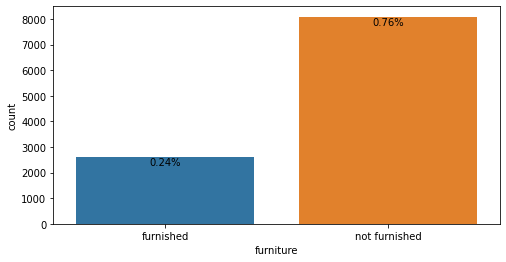

In [89]:
histplot("furniture")

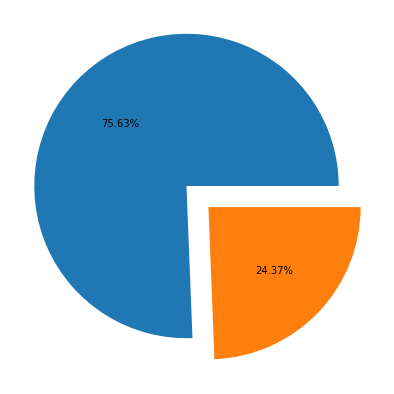

In [167]:
fig, ax = plt.subplots( figsize = (15, 7))
 
percentage = df["furniture"].value_counts()

plt.pie(percentage,explode=(0.1,0.1), autopct= "%0.2f%%")  

plt.show()

##### Here from the above two diagramatical demonstrations we can notice that the highest proportion houses in Brazil are un-furnished i.e;  75.63%

## Analysis of continuous/numerical data:

In [203]:
#Numerical column/data infoormation extracting user-defined function...

def num_info(col):
    print(f"The Mean of the {col} : {df[col].mean()}")
    print(f"The Median of the {col} : {df[col].median()}")
    print(f"The Mode of the {col} : {df[col].mode()[0]}")
    print(f"The Standard deviation of the {col} : {df[col].std()}")
    print(f"Number of missing values in the {col} : {df[col].isnull().sum()}")

In [206]:
def box_hist(col):

    fig, ax = plt.subplots(1, 2, figsize= (20, 7))

    sns.histplot(x = df[col], ax =ax[1], color = "m") 

    sns.boxplot(x = df[col], ax = ax[0], color = "g") 

    plt.show()

## 4.Rooms

In [202]:
num_info("rooms")

The Mean of the rooms : 2.506079311634867
The Median of the rooms : 2.0
The Mode of the rooms : 3
The Standard deviation of the rooms : 1.1712662540982353
Number of missing values in the rooms : 0


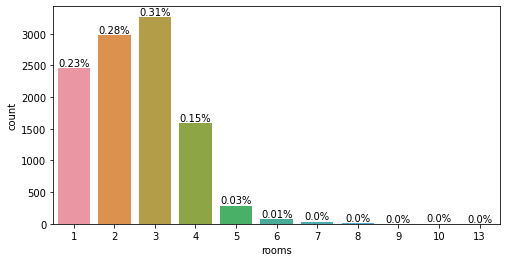

In [98]:
histplot("rooms")

##### From the above diagramatical demonstration we can observe that majority of  the houses in Brazil are having rooms more than 2, and 3 rooms houses are in highest proportion i.e; 31%

## 5.Bathroom

In [201]:
num_info("bathroom")

The Mean of the bathroom : 2.2368125701459034
The Median of the bathroom : 2.0
The Mode of the bathroom : 1
The Standard deviation of the bathroom : 1.4071981983604036
Number of missing values in the bathroom : 0


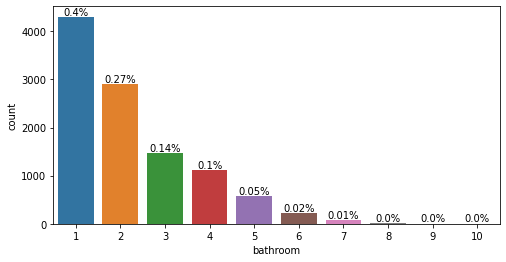

In [99]:
histplot("bathroom")

In [354]:
# mean=int(df['bathroom'].mean())
# x=df[df['bathroom']>25000].index
# for index in x:
#     df.loc[index,'bathroom)']=mean

##### From the above diagramatical demonstration we can observe that majority of  the houses in Brazil are having bathrooms 2 or more than 2 and houses with 1 bathroom are in highest proportion i.e; 40% from that we can estimate that 40% percent of the Brazil houses are of small family or small houses.

## 6.Parking Spaces

In [200]:
num_info("parking spaces")

The Mean of the parking spaces : 1.6091470258136924
The Median of the parking spaces : 1.0
The Mode of the parking spaces : 1
The Standard deviation of the parking spaces : 1.589520723805543
Number of missing values in the parking spaces : 0


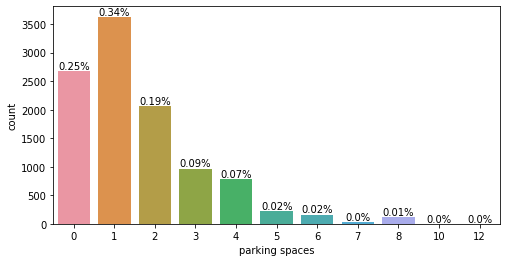

In [100]:
histplot("parking spaces")

##### Here from the above diagram we can observe that in Brazil there are 25 % of houses with no parking slots, houses with 2 or more than 2 parking slots are of 20-30 % and houses with alteast 1 parking slot are of highest i.e;  34%

## 7.Floor

In [267]:
num_info("floor")

The Mean of the floor : 5.0679947624392065
The Median of the floor : 3.0
The Mode of the floor : 0
The Standard deviation of the floor : 6.069050243218473
Number of missing values in the floor : 0


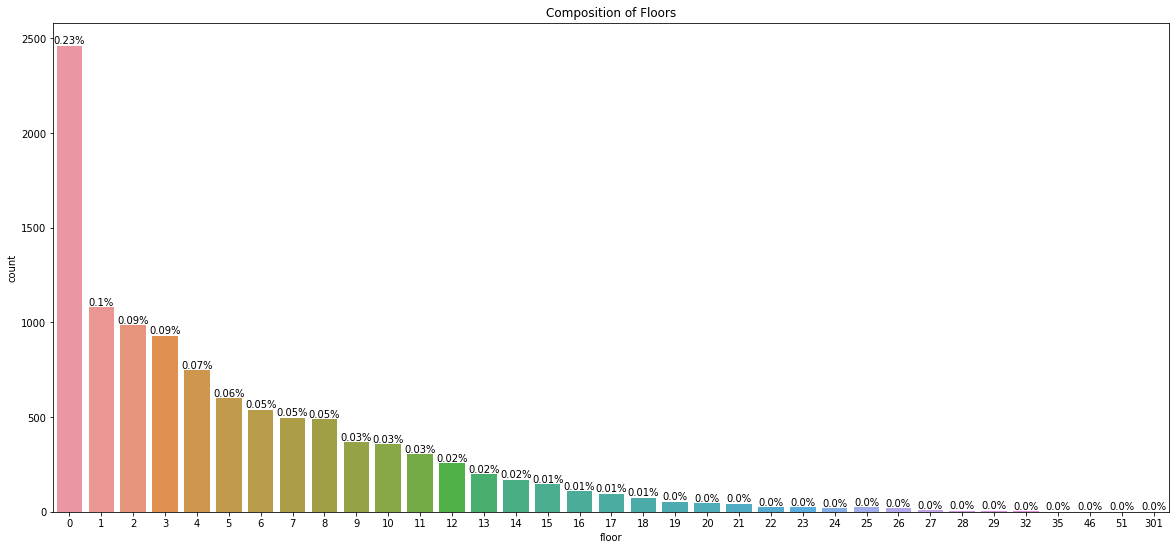

In [268]:
fig, ax = plt.subplots(figsize=(20,9))
    
ax = sns.countplot(x = df["floor"])

for bar in ax.patches:
    
    percentage = f"{round(bar.get_height() /len(df), 2)}%" 
    
    x = bar.get_x() + bar.get_width() /2
    
    y = bar.get_height()   
    
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )
    #ax.annotate(percentage, (x, y), va = "top", ha ="center" )

plt.title("Composition of Floors")    
plt.show()

##### From the above diagramtical representation we can oserve that in Brazil their are larger proportion of ground level houses i.e; 23% compared to the other houses, which varies from 1-17 floors in Brazil.
##### Further the houses of floors more than 10 are very less which are approximately between 1-4%.

# ---------------------------------------------------------------------------------------------------------------

# Level 2 Analysis:

# $Bivariate \ Analysis \$

In [235]:
def cat_cat_hist(col):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.countplot(x = (col), hue = "city", data = df)
    plt.show()

In [270]:
def cat_cat_histplot(col):
    fig, ax = plt.subplots(figsize = (10, 7))
    sns.histplot(data=df,x=(col),hue="city")
    plt.show()

In [236]:
def cn_box_hist(col):  
    
    fig, ax = plt.subplots(1,                   #for creaing sublots(empty)...
                           2,
                           figsize = (15, 7))
    
    sns.histplot(x = df[col],                   #for histogram...
                 hue = df["city"],
                 ax = ax[0])
    
    sns.boxplot(y = df[col],                    #for boxplot...
                x = df["city"],
                ax = ax[1])
    
    plt.show()

# 1. City v/s Animal Allowance v/s Furnised and non Furnished houses

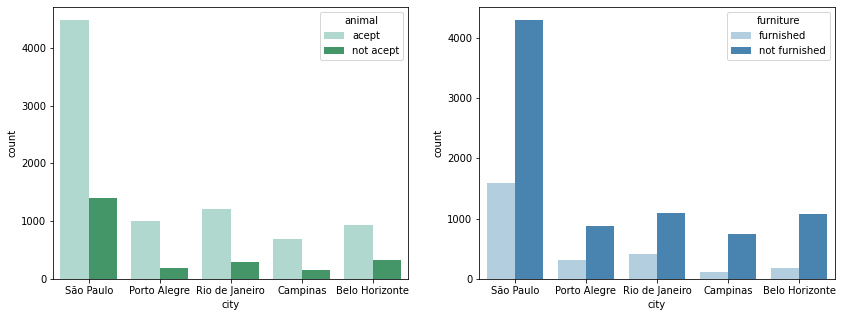

In [349]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
x=x.sort_values()
sns.countplot(x='city',
              hue='animal',
              data=df, 
              palette='BuGn',
              ax=axes[0],);

sns.countplot(x='city',
              hue='furniture',
              data=df,
              palette='Blues',
              ax=axes[1]);

##### From the above diagramatical representation It is evident that 50-60% of all houses in Brazil are not furnished and also do accept animals.
>As most of the houses are located in Sao Paulo, so most of the furnished as well animal acceptance or allowance can be observed in the same Sao Paulo city only.  
Least furnished houses are in Campinas  &  Most furnished houses are in Sao Paulo  
Least animal acceptance can be observed in Campinas & high in Sao Paulo

<AxesSubplot:xlabel='furniture', ylabel='animal'>

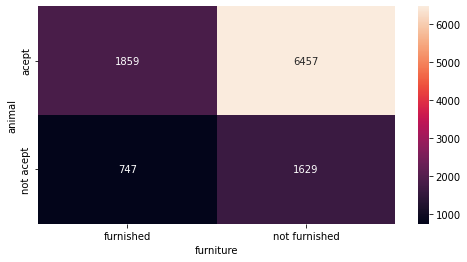

In [261]:
sns.heatmap(df.groupby(['animal','furniture']).size().unstack(),annot=True,fmt="d")

#using unstack() pulling out the data of particular indexes in a measureable or undrstandable manner...
#using "annot" parameter for extracting particular values of animals acceptance and furnished or non furnished houses in Brazil cities...
#fmt for strings...String formatting code to use when adding annotations...

##### Also from the heat map we can get the complete picture of no. houses in Brazil with animal acceptance and furnished or non furnished...

# 2.City v/s Houseowner Association Tax

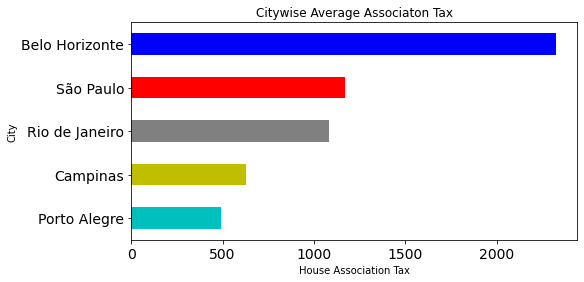

In [344]:
#plot the bar graph of city with average HOA tax rate...

df.groupby('city')['hoa (R$)'].mean().sort_values().plot.barh(title="Citywise Average Associaton Tax",
                                               color=['c','y','grey','r','b'],
                                               fontsize=14)
plt.xlabel("House Association Tax")
plt.ylabel("City")
plt.show()

##### From the above diagramatical illustration we can observe that "Belo Horizone" city of Brazil is collecting highest margin of HA Tax rate compared to the other cities and least tax rate is in "Porto Alegre" city.

# 3. City v/s Rent Amount 
>To understand the of cost of living in the city

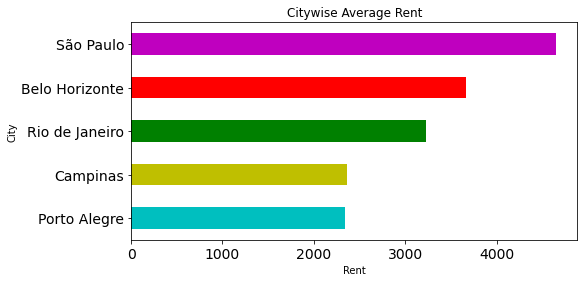

In [343]:
#plot the bar graph of city with average HOA tax rate...

df.groupby('city')['rent amount (R$)'].mean().sort_values().plot.barh(title="Citywise Average Rent",
                                               color=['c','y','g','r','m'],
                                               fontsize=14)
plt.xlabel("Rent")
plt.ylabel("City")
plt.show()

In [5]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).
    
    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.
    
    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : float or array-like
        The height(s) of the bars.
    
    width : float or array-like, default: 0.8
        The width(s) of the bars.
    
    bottom : float or array-like, default: 0
        The y coordinate(s) of the bars bases.
    
    align : {'center', 'edge'}, default: 'center'
        Alignment of the bars to the *x* coordinates:
    
   

##### Here from the above diagram we can observe that Sao Paulo city is having higher rental demand for houses wheras Porto and Campinas are having an affordable rental charges compared to Sao Paulo and Belo Horizone

# 4. City v/s Property Tax
>To understand the cost of living in the city

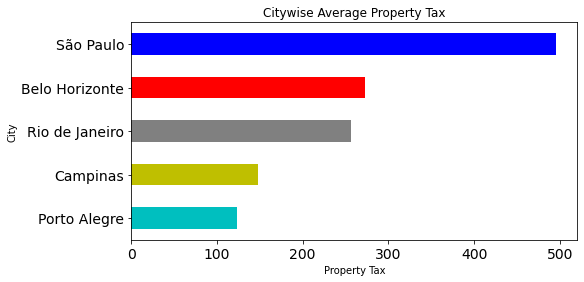

In [353]:
#plot the bar graph of city with average property tax rate...

df.groupby('city')['property tax (R$)'].mean().sort_values().plot.barh(title="Citywise Average Property Tax",
                                               color=['c','y','grey','r','b'],
                                               fontsize=14,)
plt.xlabel("Property Tax")
plt.ylabel("City")
plt.show()

##### Interpretation:
>Here from the above illustration we can observe that Sau Paulo city is highest property tax collector compared to other cities as the city has more population (houses) when compared to others

# 5.City v/s Fire Insurance

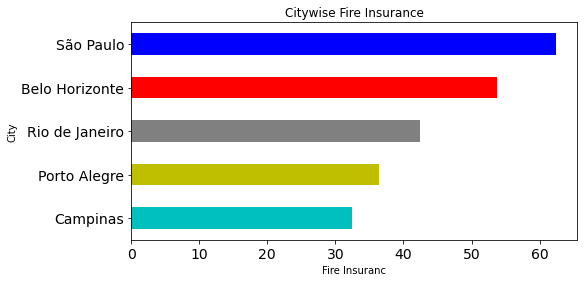

In [352]:
#plot the bar graph of city with fire insurance...

df.groupby('city')['fire insurance (R$)'].mean().sort_values().plot.barh(title="Citywise Fire Insurance",
                                               color=['c','y','grey','r','b'],
                                               fontsize=14,)
plt.xlabel("Fire Insurance")
plt.ylabel("City")
plt.show()

##### Interpretation:
>Here in the above ilustration we can estimate that the fire accident prone cities are Sau Paulo and Belo Horinzonte as they have the highest fire insurance collection from the house owners in Brazil.   
>Least estimation for fire accident prone city is Campinas and can be safe when compared to other cities.

# LEVEL 3

# Multi-Variate Analysis:

##### Choosing an alternate city to relocate:
>1.rent based on the no.of rooms and city  ?  
>2.which city has the most no. of houses for rent with no. of rooms  ?  
>3.which city highest rent on an average basec on no. of rooms ? 
>4.which city has highest property tax based on area  ?  
>5.which city has highest fire insurance based on area and furnished house  ?  
>6.Higher the fire insurance with high furnished house  ?  

In [317]:
df["city"].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [279]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')